In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(121,122)]
i =0
result = np.zeros((12,901,1500))

In [3]:
for yy in years:
    for mm in months:
        #data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.aice.nc')
        #cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0323-09.aice.nc
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SST.nc')
        plotvar = data.variables['TEMP'][0,30,:,:]
        #plotvar = data.variables['HMXL'][0,:,:]
        lontu = data.variables['TLONG'][:,500:2000]
        lattu = data.variables['TLAT'][:,500:2000]
        #lont = lont[248:344,700:1400]
        #latt = latt[248:344,700:1400]
        plotvar = plotvar[:,500:2000]
#       lont = lont[180:320,500:1200]
#        latt = latt[180:320,500:1200]
#        plotvar = plotvar[180:320,500:1200]
        aveplot = plotvar
        
        result[i] = aveplot
        
        i = i + 1

In [4]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    history: Fri Mar  6 16:26:38 2020: ncks -v TEMP -d nlat,0,900 -d nlon,0,3599 B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0121-12.nc B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0121-12.SST.nc
none
    Conventions: CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-current.htm
    contents: Diagnostic and Prognostic Variables
    source: CCSM POP2, the CCSM Ocean Component
    revision: $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar: All years have exactly  365 days.
    start_time: This dataset was created on 2019-07-20 at 14:28:14.0
    cell_methods: cell_methods = time: mean ==> the variable values are averaged over the time interval between the previous time coordinate and the current one.          cell_methods  absent  ==> the variable values are at the time given by the current time coord

In [5]:
re = np.nanmean(result,axis=0)

In [6]:
re

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [-1.        , -1.        , -1.        , ..., 11.33387049,
        11.34849056, 11.36769684],
       [-1.        , -1.        , -1.        , ..., 11.35952528,
        11.37319326, 11.39121278],
       [-1.        , -1.        , -1.        , ..., 11.3991553 ,
        11.40755844, 11.42157968]])

In [7]:
        datau=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.UVEL.nc')
        plotvaru = datau.variables['UVEL'][0,1,:,500:2000]
        #lontu = datau.variables['ULONG'][:,500:2000]
        #lattu = datau.variables['ULAT'][:,500:2000]
        re[re == -1] = np.nan
        re[re >  1000] = np.nan

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [8]:
        result[result == -1] = np.nan
        result[result >  1000] = np.nan

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [9]:
aaa =   np.std(result,axis=0)

In [10]:
        #nice_cmap=plt.get_cmap('ocean')
        #nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)nice_cmap=plt.get_cmap('jet')
        nice_cmap=plt.get_cmap('jet')
        lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,210,220,230,240,290,300])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        new_cmap = cols.ListedColormap(lev_cmap,"jet")
        #lev_cmap = nice_cmap([0,500,1000,1500,2000,2500,3000])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        nice_levels = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3]
        #nice_levels = [0,40,80,120,200,300]
        #nice_levels = [0,10,20,30,40,50,60,70,80,90,100]
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'spacing'
  app.launch_new_instance()
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


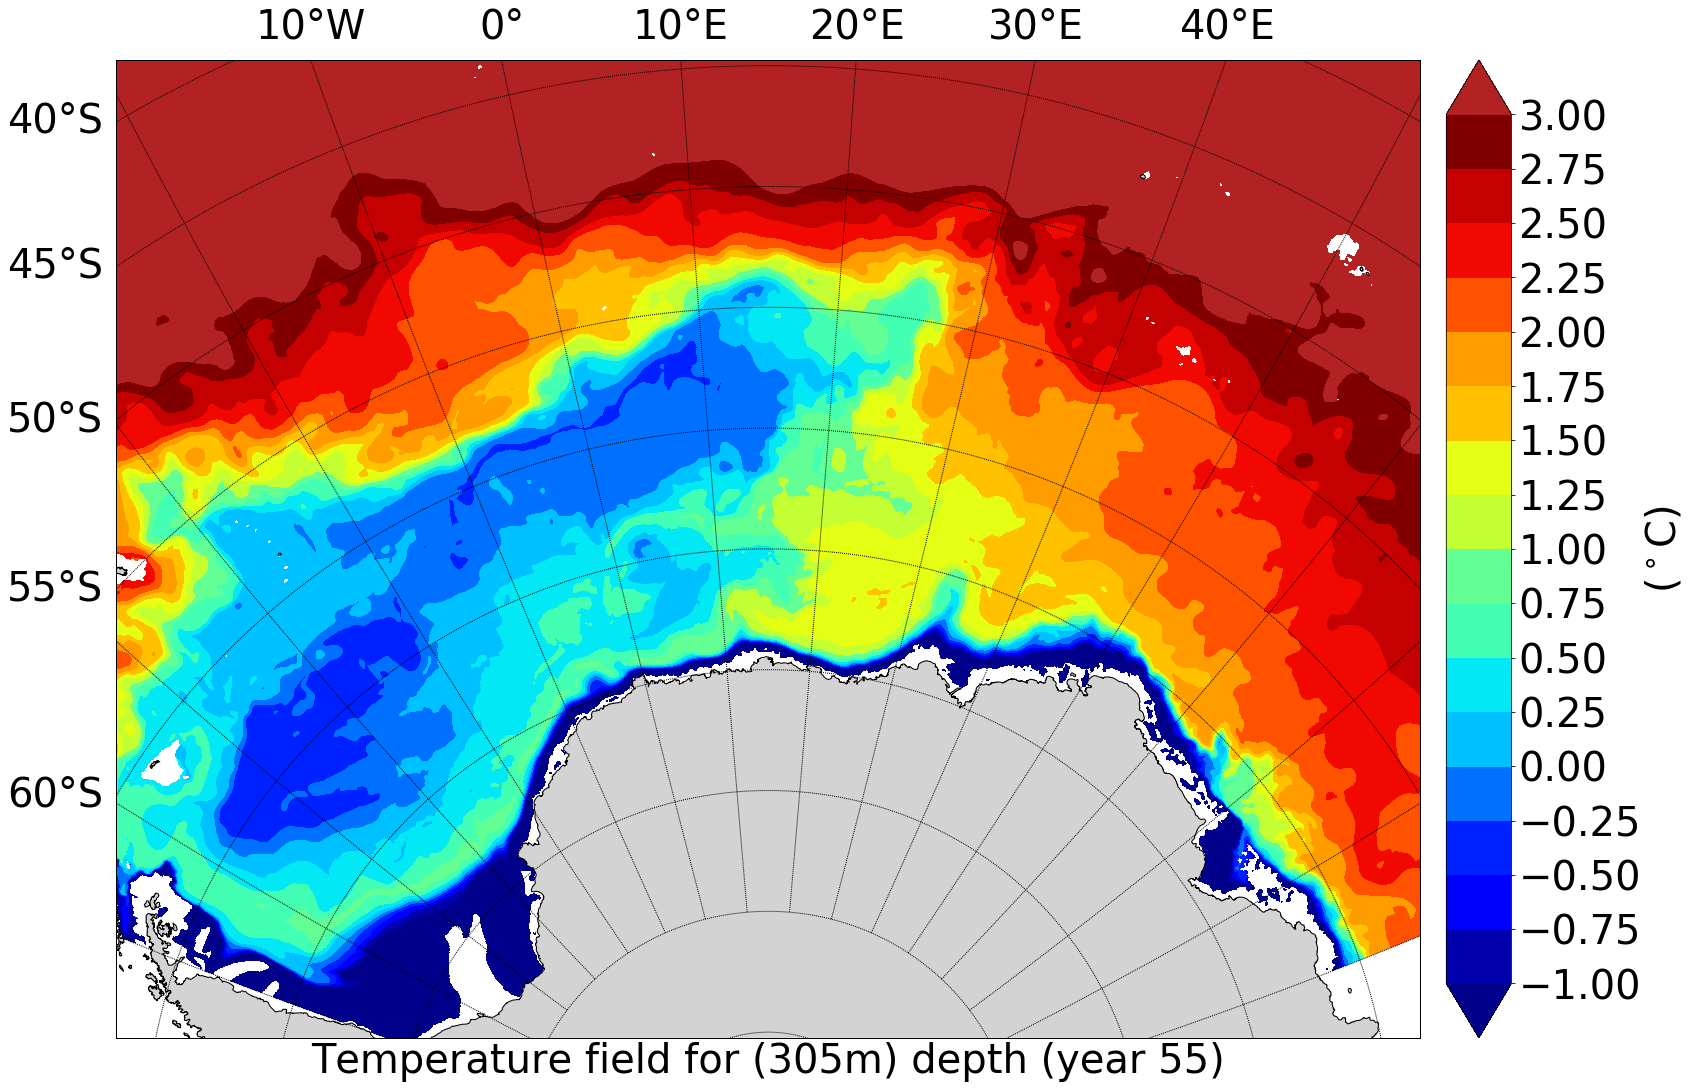

In [11]:

        plt.figure(figsize=(25,20))
        my_font = {'fontname':'Cambria', 'size':'40'}

        map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 15,area_thresh = 100,\
                     width = 6000000,height = 4500000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

       
        xq,yq=map(lontu,lattu)

        CP = map.contourf(xq,yq,re,cmap = new_cmap,spacing = 'uniform',levels = nice_levels,extend='both')
       
        CP.cmap.set_over('firebrick')
        CP.cmap.set_under('darkblue')
        cbar =map.colorbar(CP,extend='both',extendfrac='auto',ticks= nice_levels)
      
        cbar.ax.tick_params(labelsize=40) 
        cbar.set_label('($^\circ$C)', **my_font)
        plt.xlabel('Temperature field for (305m) depth (year 55)',**my_font)
        plt.savefig("/scratch/user/xiliangdiao/plot/temave(21-321)",bbox_inches='tight')

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'spacing'


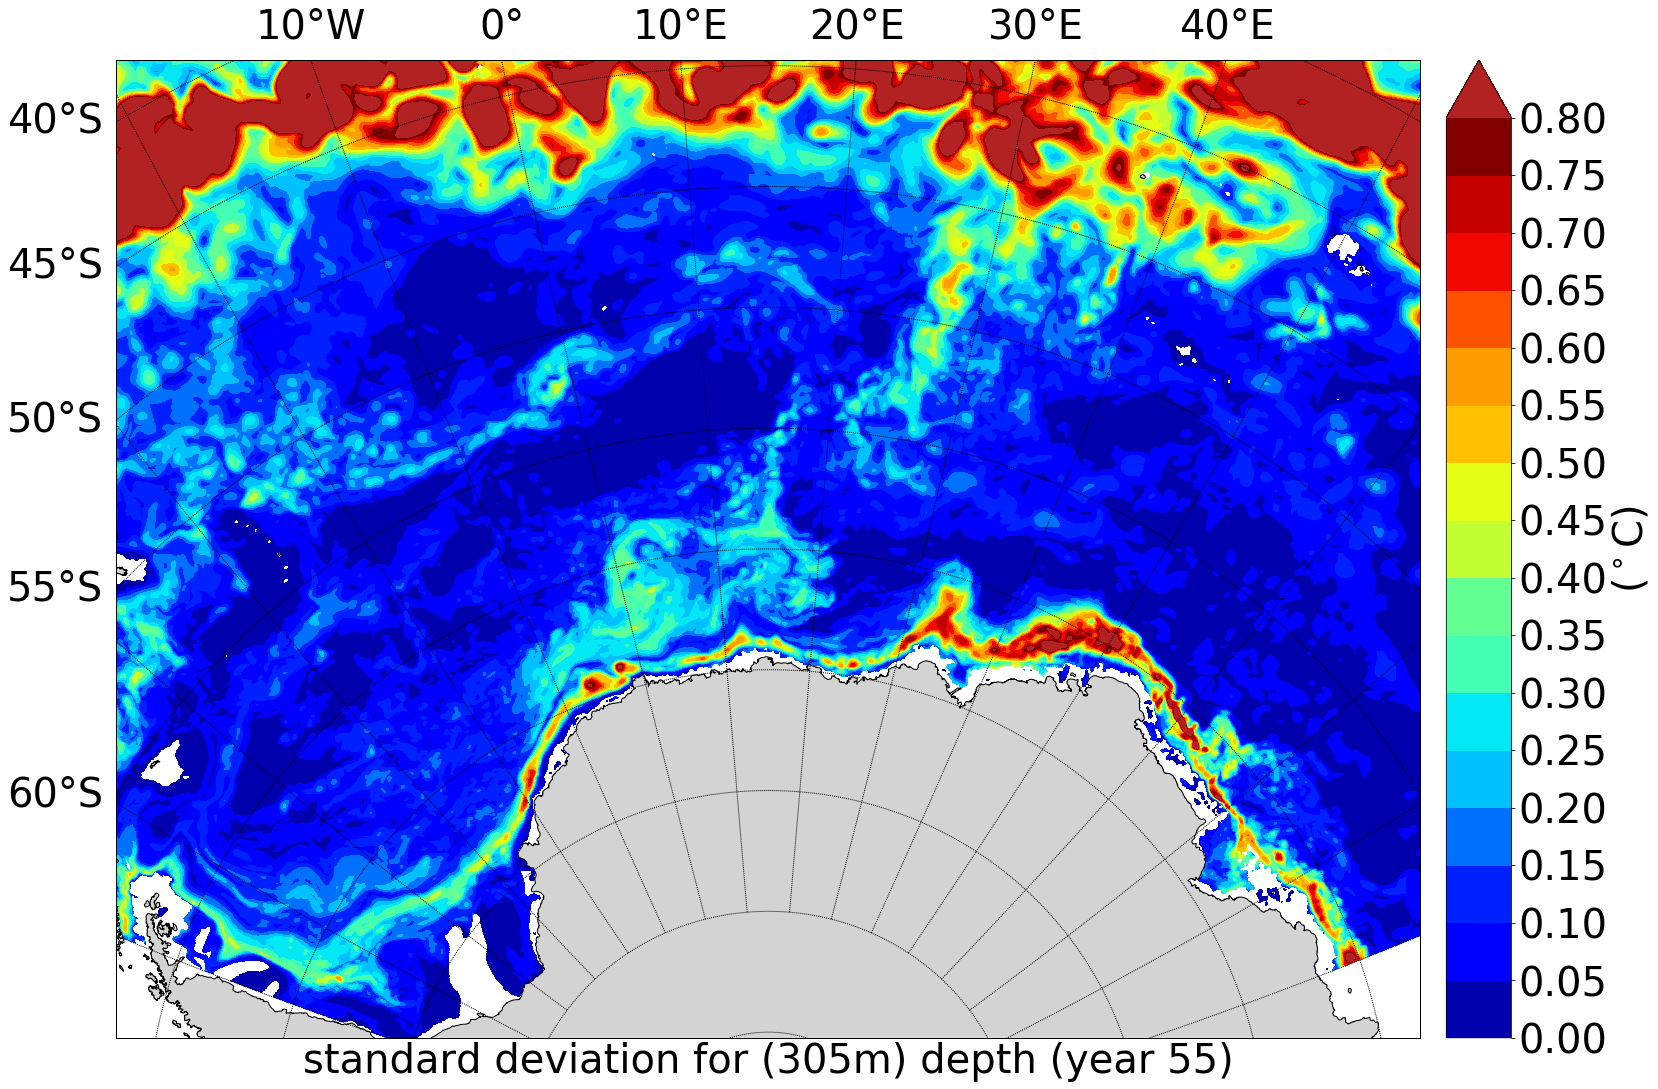

In [12]:
        nice_levels = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]
        plt.figure(figsize=(25,20))
        my_font = {'fontname':'Cambria', 'size':'40'}

        map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 15,area_thresh = 100,\
                     width = 6000000,height = 4500000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

       
        xq,yq=map(lontu,lattu)

        CP = map.contourf(xq,yq,aaa,cmap = new_cmap,spacing = 'uniform',levels = nice_levels,extend='max')
       
        CP.cmap.set_over('firebrick')
        CP.cmap.set_under('red')
        cbar =map.colorbar(CP,extend='both',extendfrac='auto',ticks= nice_levels)
        cbar.ax.tick_params(labelsize=40)
        cbar.set_label('($^\circ$C)', **my_font)
        plt.xlabel('standard deviation for (305m) depth (year 55)',**my_font)
        plt.savefig("/scratch/user/xiliangdiao/plot/std(21-321)",bbox_inches='tight')